In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

from xgboost import XGBRegressor

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29Xbost.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirovs PC],Min partial charge for a N atom [Zefirovs PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [Quantum-Chemical PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [9]:
x_test.shape

(212, 29)

In [10]:
x_train.shape

(844, 29)

In [11]:
# soilution of problems ( ValueError('feature_names may not contain [, ] or <'))
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]
x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x.columns.values]

In [12]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
#train_dataset = cb.Pool(x_train, y_train) 
#test_dataset = cb.Pool(x_test, y_test)

In [13]:
XGBRegressor?

In [14]:
regressor = XGBRegressor(n_estimators=300, importance_type='weight')

In [15]:
regressor.fit (x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type='weight',
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [16]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [17]:
y_pred_train = regressor.predict(x_train)

In [18]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [19]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [20]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.16605560190636875
MSE is 0.06564448460377643
R2 score is 0.7485662026251676


In [21]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [22]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.0010971150140412912
MSE is 6.585131527770068e-05
R2 score is 0.9997148613186719


In [23]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [24]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.72965625 0.52330874 0.67217766 0.61115137 0.58999642]
Q2 is 0.6252580903414511


In [24]:
regressor.feature_importances_

array([0.09639624, 0.03035683, 0.02822652, 0.03035683, 0.0294692 ,
       0.03710279, 0.03870051, 0.01455707, 0.01721995, 0.028049  ,
       0.05023966, 0.04100834, 0.03763536, 0.03958814, 0.03834546,
       0.04296112, 0.03301971, 0.02325581, 0.03745784, 0.03603764,
       0.02982425, 0.03799041, 0.02556364, 0.04775431, 0.02751642,
       0.02378839, 0.02662879, 0.02343334, 0.02751642], dtype=float32)

In [36]:
features=x.columns

In [37]:
## to see the all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [40]:
df_coeff = pd.DataFrame({"features":features,"Importance":regressor.feature_importances_})
## sort importance with top 100[:100]
df_coeff.sort_values("Importance", ascending=False)

,features,Importance
0,Number of atoms,0.096396
10,PPSA-3 Atomic charge weighted PPSA _Zefirovs PC_,0.050240
23,RNCS Relative negative charged SA (SAMNEG*RNCG...,0.047754
15,HOMO - LUMO energy gap,0.042961
11,PNSA-3 Atomic charge weighted PNSA _Zefirovs PC_,0.041008
13,LUMO energy,0.039588
6,Balaban index,0.038701
14,LUMO+1 energy,0.038345
21,Tot dipole of the molecule,0.037990
12,RNCS Relative negative charged SA (SAMNEG*RNCG...,0.037635


Text(0.5, 0, 'Xgboost Feature Importance')

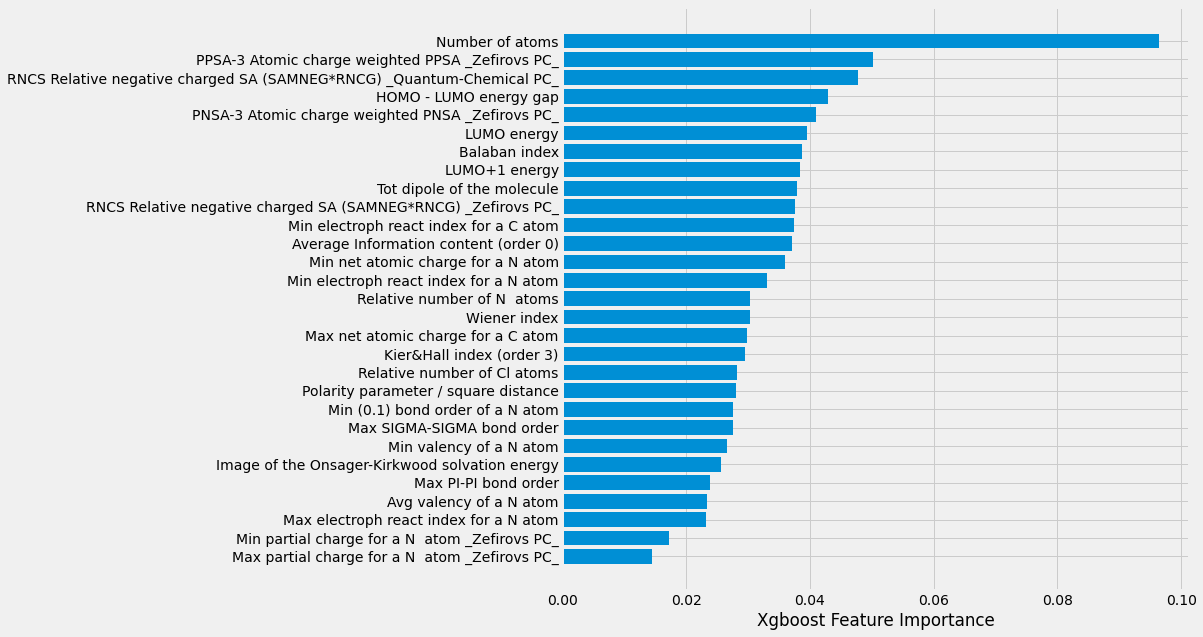

In [54]:
sorted_idx = regressor.feature_importances_.argsort()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 12})
plt.barh(x.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [55]:
regressor.importance_type

'weight'

In [57]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(regressor, x_test, y_test)

Text(0.5, 0, 'Permutation Importance')

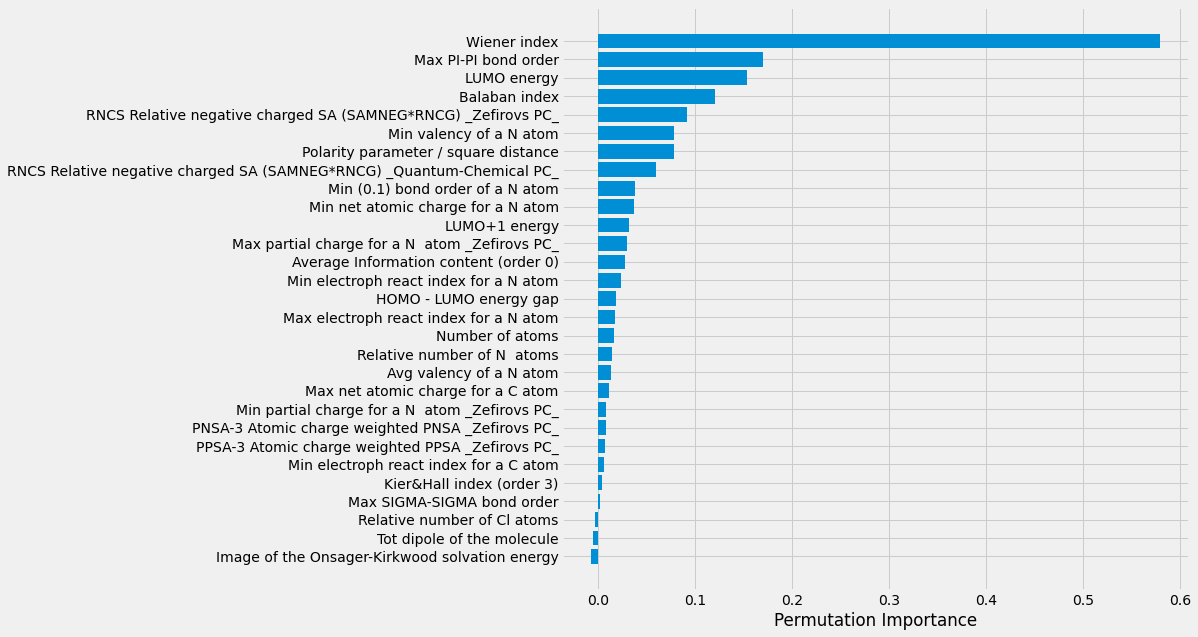

In [59]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 12})
plt.barh(x.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

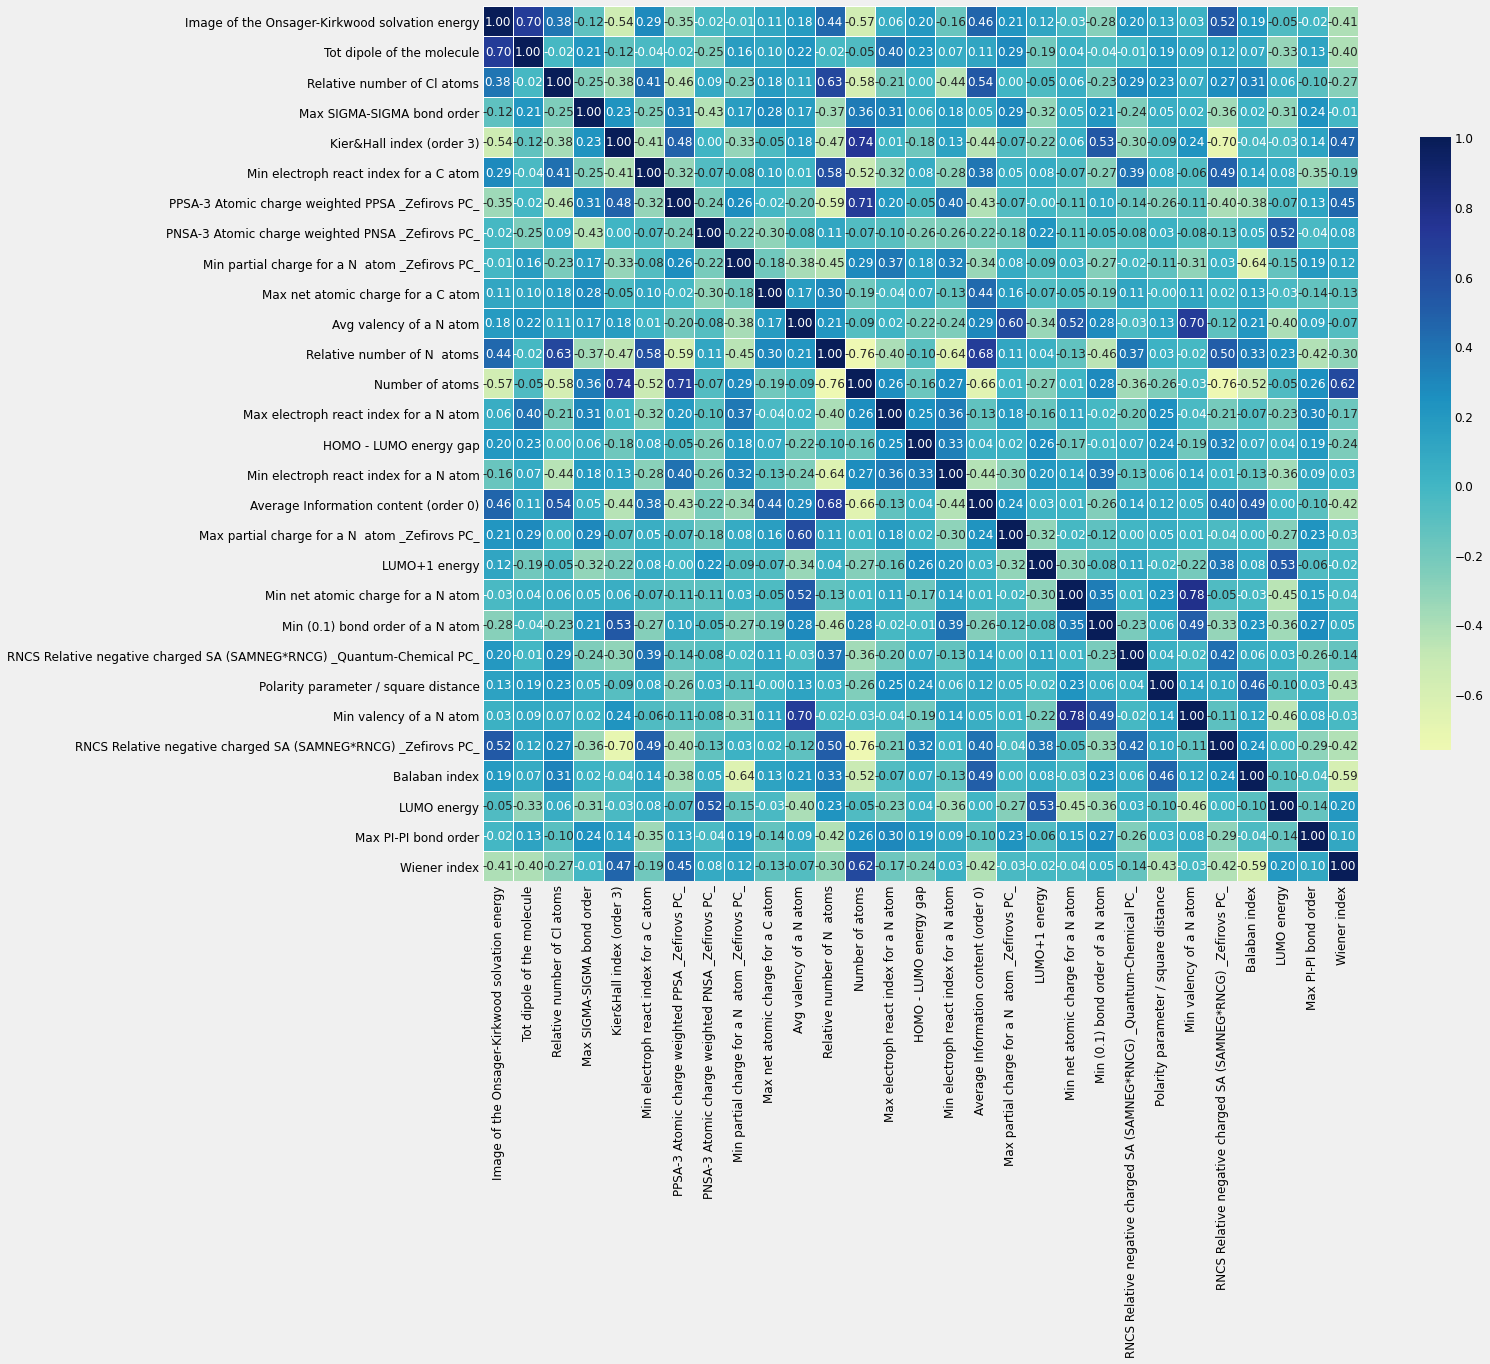

In [63]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(x_train[x.columns[sorted_idx]])

In [64]:
import shap

In [72]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)

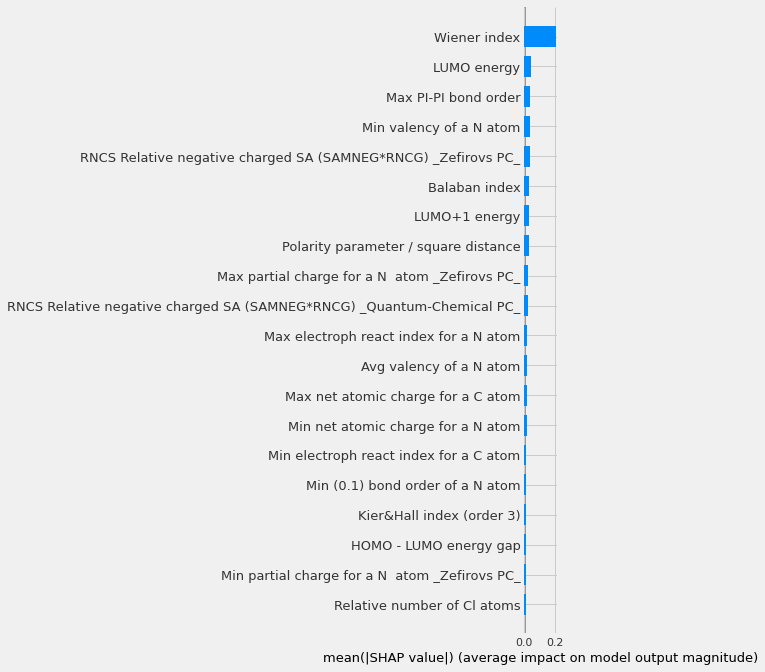

In [73]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

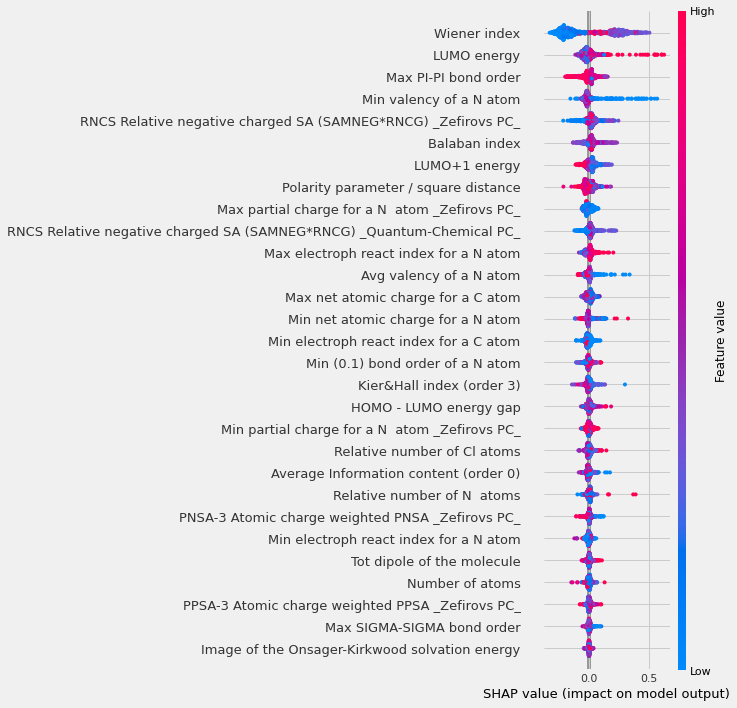

In [74]:
shap.summary_plot(shap_values, x_train, x.columns, show = False, plot_size=[10,10], max_display=x.shape[1])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


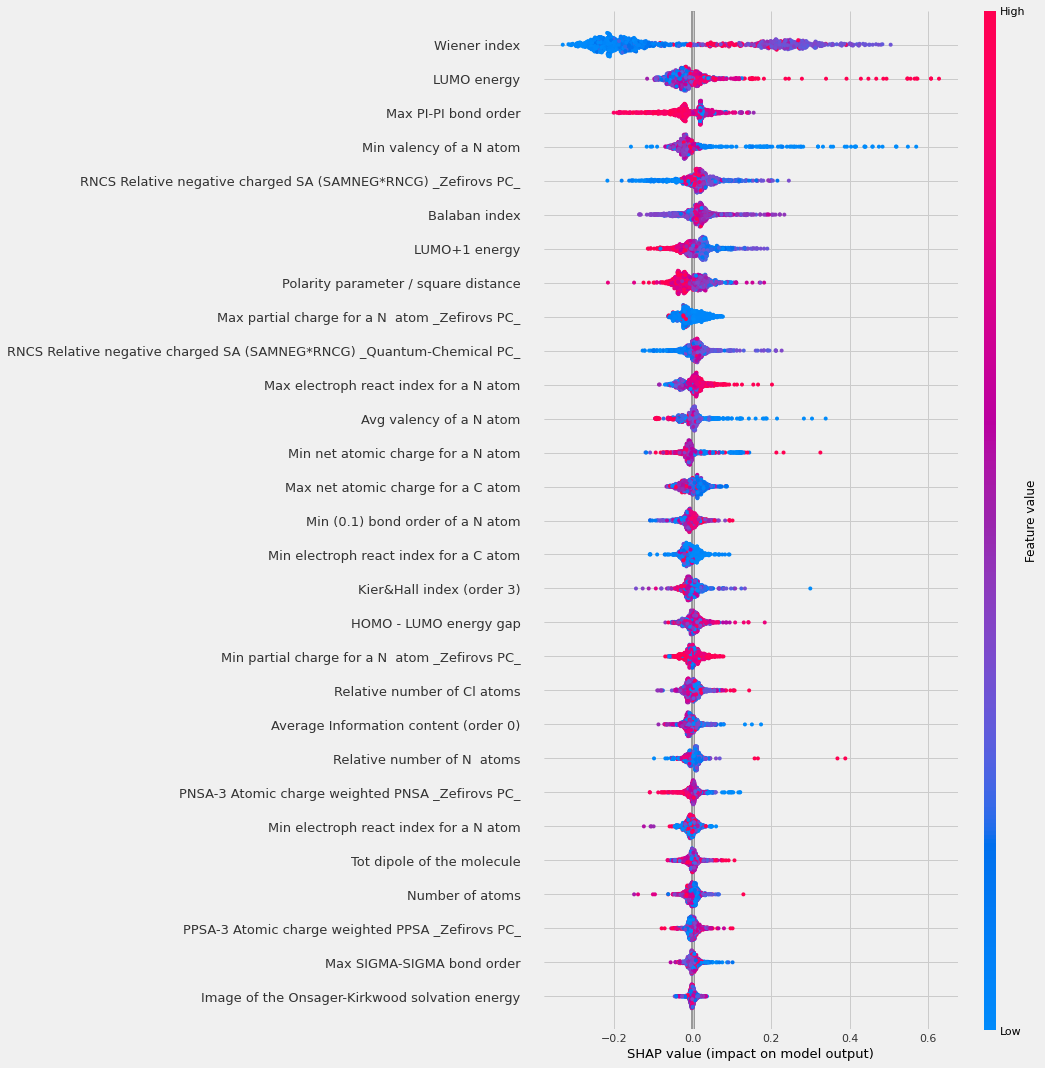

In [163]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x, x.columns, show = False, plot_size=[15,15], max_display=x.shape[1])
plt.gcf().set_size_inches(15,15)

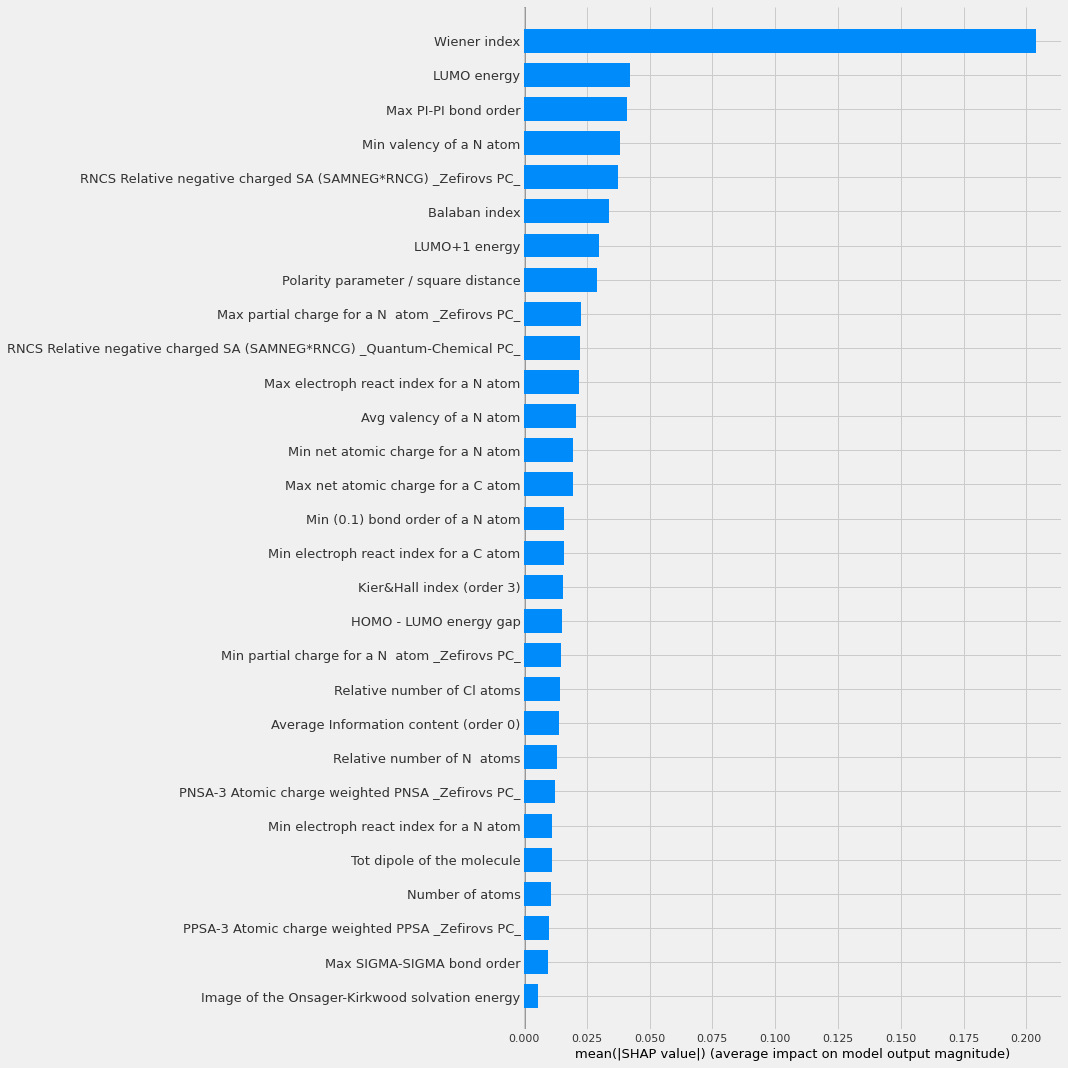

In [164]:
shap.summary_plot(shap_values, x, plot_type="bar", max_display=x.shape[1], plot_size=[15,15])

In [ ]:
shap.dependence_plot("Wiener index", shap_values, x_train)

In [205]:
cb.get_feature_importance(type= "___")

NameError: name 'cb' is not defined

In [44]:
regressor1 = cb.CatBoostRegressor(loss_function='RMSE')

In [45]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [46]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [47]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [48]:
regressor_grid.fit (x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 0.4689367	total: 15.8ms	remaining: 3.13s
1:	learn: 0.4455432	total: 114ms	remaining: 11.3s
2:	learn: 0.4262150	total: 208ms	remaining: 13.6s
3:	learn: 0.4093722	total: 332ms	remaining: 16.3s
4:	learn: 0.3928102	total: 424ms	remaining: 16.5s
5:	learn: 0.3795109	total: 519ms	remaining: 16.8s
6:	learn: 0.3635736	total: 607ms	remaining: 16.7s
7:	learn: 0.3510385	total: 711ms	remaining: 17.1s
8:	learn: 0.3392952	total: 755ms	remaining: 16s
9:	learn: 0.3294088	total: 801ms	remaining: 15.2s
10:	learn: 0.3172633	total: 860ms	remaining: 14.8s
11:	learn: 0.3087625	total: 944ms	remaining: 14.8s
12:	learn: 0.3022954	total: 972ms	remaining: 14s
13:	learn: 0.2937857	total: 1.01s	remaining: 13.5s
14:	learn: 0.2876662	total: 1.07s	remaining: 13.2s
15:	learn: 0.2809152	total: 1.13s	remaining: 13s
16:	learn: 0.2744983	total: 1.18s	remaining: 12.7s
17:	learn: 0.2686630	total: 1.23s	remaining: 12.4s
18:	learn: 0.2631851	total: 1.29s	r

165:	learn: 0.0476770	total: 6.95s	remaining: 1.42s
166:	learn: 0.0472717	total: 6.99s	remaining: 1.38s
167:	learn: 0.0468148	total: 7.01s	remaining: 1.34s
168:	learn: 0.0462071	total: 7.05s	remaining: 1.29s
169:	learn: 0.0455765	total: 7.08s	remaining: 1.25s
170:	learn: 0.0450752	total: 7.11s	remaining: 1.21s
171:	learn: 0.0445131	total: 7.15s	remaining: 1.16s
172:	learn: 0.0441724	total: 7.19s	remaining: 1.12s
173:	learn: 0.0436072	total: 7.22s	remaining: 1.08s
174:	learn: 0.0433001	total: 7.25s	remaining: 1.04s
175:	learn: 0.0430445	total: 7.32s	remaining: 998ms
176:	learn: 0.0427866	total: 7.35s	remaining: 956ms
177:	learn: 0.0421908	total: 7.38s	remaining: 913ms
178:	learn: 0.0420615	total: 7.42s	remaining: 870ms
179:	learn: 0.0418011	total: 7.45s	remaining: 828ms
180:	learn: 0.0412746	total: 7.48s	remaining: 785ms
181:	learn: 0.0408766	total: 7.5s	remaining: 742ms
182:	learn: 0.0406680	total: 7.53s	remaining: 700ms
183:	learn: 0.0404261	total: 7.57s	remaining: 658ms
184:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001873673E3A0>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [100, 150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.03, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [49]:
regressor_grid.best_params_

{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 0.2, 'learning_rate': 0.1}

In [50]:
regressor_grid.best_score_

-0.07660191515400258